In [1]:
"""Дата и время в Питоне."""

'Дата и время в Питоне.'

## Дата и время в Питоне.

- Говоря про временные ряды, мы уже начали анализировать данные, в которых присутствует дата и время (в частности, в библиотеке Pandas). Сегодня мы сделаем шаг назад и посмотрим в целом как работать с датой и временем в Питоне.

## Модуль datetime

- В базовом функционале Питона нет отдельного типа данных, отвечающего за дату и время. Необходимо импортировать модуль, который называется datetime.
- Первая особенность, про которую стоит сказать, datetime — это не только название модуля, но и название одного из классов внутри этого модуля. Помимо класса datetime, нас будет интересовать ещё один класс — timedelta.

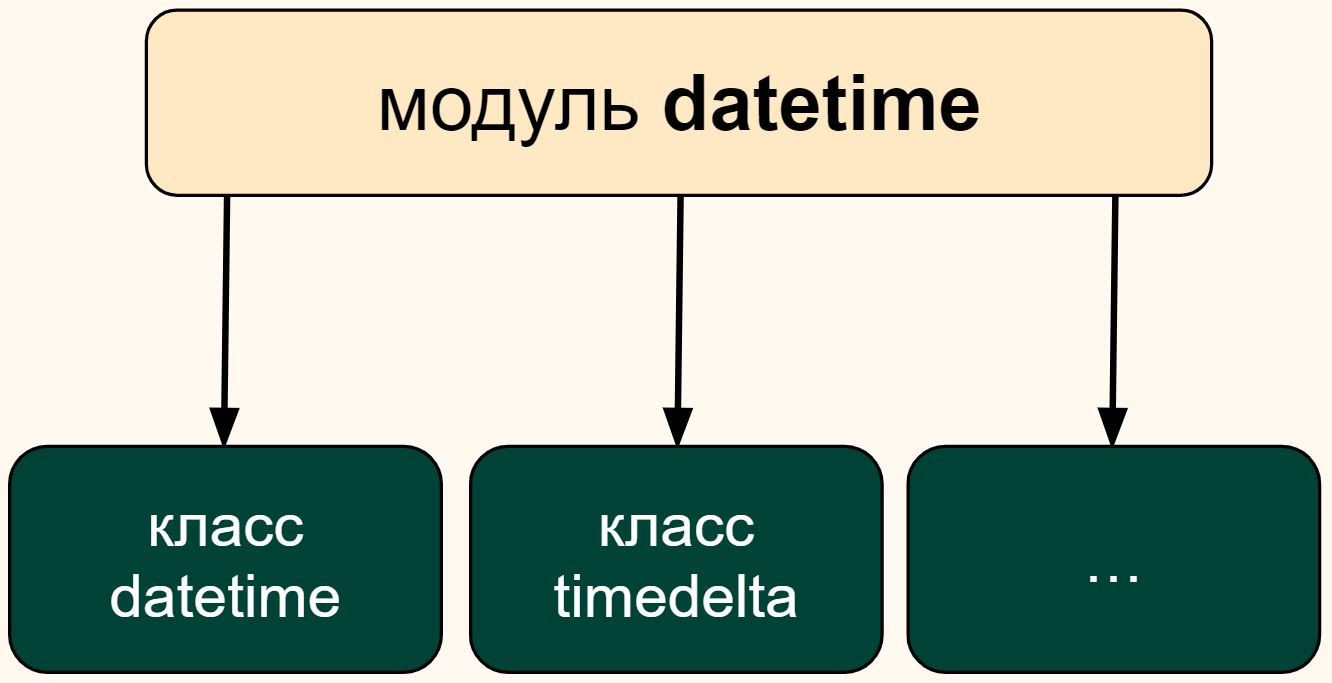

Перейдем к практике.

### Импорт модуля и класса datetime
- Самый простой способ — импортировать весь модуль datetime.

In [ ]:
# импортируем весь модуль
# import datetime

# для этого вначале импортируем соответствующий класс
# from datetime import timedelta
from datetime import datetime, timedelta

import pytz

- Далее предположим, что мы хотим воспользоваться функцией now(), которая находится внутри класса datetime. Функция now() выводит текущие дату и время.

In [39]:
# чтобы получить доступ к функции now(), сначала обратимся к модулю, потом к классу
print(datetime.now())

2025-12-06 14:09:21.119318


- Как вы видите, это не очень удобно. Можно импортировать только класс datetime и обращаться непосредственно к нему.

In [40]:
print(datetime.now())

2025-12-06 14:09:23.778719


### Объект datetime и функция now()
- Теперь поговорим подробнее про то, что выводит функция now().

In [ ]:
# поместим созданный с помощью функции now() объект datetime в переменную cur_dt
cur_dt: datetime = datetime.now()
print(cur_dt)

2025-12-06 13:41:36.763797


- На выходе мы получаем текущие дату и время по UTC⧉, потому что серверы Google Colab настроены именно на это время (московское время, например, отличается на +3 часа). Сам вывод состоит из следующих компонентов.

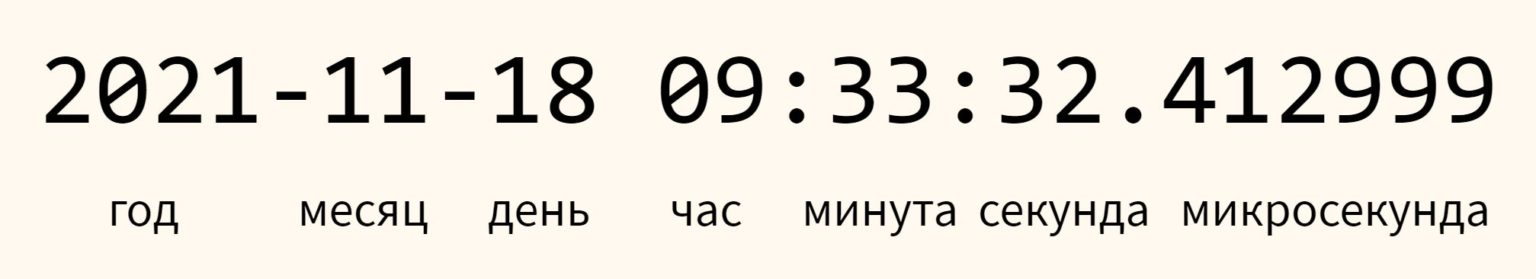

- Мы можем обратиться к каждому из этих компонентов по отдельности.



In [6]:
# с помощью соответствующих атрибутов выведем каждый из компонентов объекта
print(
    cur_dt.year,
    cur_dt.month,
    cur_dt.day,
    cur_dt.hour,
    cur_dt.minute,
    cur_dt.second,
    cur_dt.microsecond,
)

2025 12 6 13 41 36 763797


- Мы также можем посмотреть на день недели, причем в двух форматах. Метод .weekday() считает, что неделя начинается с нуля, метод .isoweekday(), что с единицы.

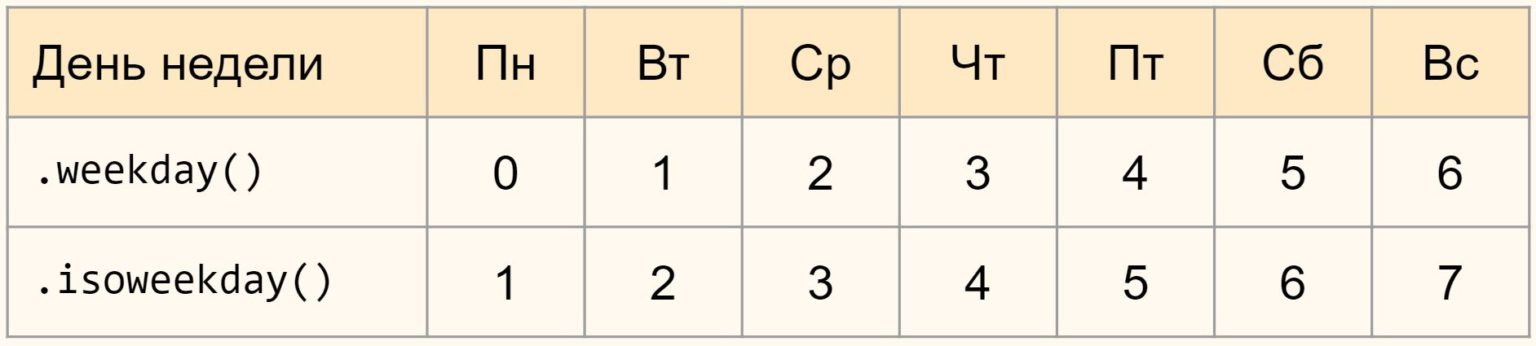

- Так как 18 ноября 2021 года — это четверг, то применив эти методы, мы должны получить цифры три и четыре соответственно.


In [7]:
print(cur_dt.weekday(), cur_dt.isoweekday())

5 6


- Объект datetime, полученный из функции now(), не содержит данных о часовом поясе.

In [8]:
# посмотрим на часовой пояс с помощью атрибута tzinfo
print(cur_dt.tzinfo)

None


- Для того чтобы добавить такую информацию и вывести, например, другой часовой пояс, нам нужно воспользоваться модулем pytz.

In [ ]:
# выведем текущее время в Москве
dt_moscow: datetime = datetime.now(pytz.timezone("Europe/Moscow"))
print(dt_moscow)

2025-12-06 13:44:13.423290+03:00


- Посмотрим, не появился ли часовой пояс.

In [10]:
print(dt_moscow.tzinfo)

Europe/Moscow


## Timestamp

- До сих пор мы работали с привычным для нас делением на годы, месяцы, дни, часы, минуты и секунды. При этом компьютеры используют так называемое время Unix, которое отсчитывается в секундах c первого января 1970 года. Для отображения даты и времени в таком формате в Питоне есть объект timestamp (по-английски — «временная отметка»).

In [46]:
# получим timestamp текущего времени с помощью метода .timestamp()
timestamp: float = datetime.now().timestamp()

- Посмотрим, сколько секунд и микросекунд прошло с 01.01.1970 и до момента исполнения кода.

In [12]:
print(timestamp)

1765017916.543417


- Не составляет труда вернуть timestamp обратно в привычный формат.

In [13]:
# для этого воспользуемся методом .fromtimestamp()
print(datetime.fromtimestamp(timestamp))

2025-12-06 13:45:16.543417


### Создание объекта datetime вручную

- Дату и время не обязательно получать из функции now(). Мы вполне можем передать объекту datetime наши собственные параметры, например, день рождения Питона.

In [ ]:
# передадим объекту datetime 20 февраля 1991 года
hb: datetime = datetime(1991, 2, 20)
print(hb)

1991-02-20 00:00:00


- Обратите внимание, мы ввели только год, месяц и день. Это обязательные параметры. Остальные параметры можно не вводить, в этом случае они заполнятся нулями.
- Из этого объекта мы также можем извлечь компоненты (год, месяц, число и т.д.) и создать timestamp.

In [15]:
# извлечем год с помощью атрибута year
print(hb.year)

# создадим timestamp
print(datetime.timestamp(hb))

1991
666997200.0


## Преобразование строки в datetime и наоборот
### Строка в datetime через .strptime()

- Если дата содержится в строковом формате, Питон не сможет извлечь из нее компоненты. Предварительно строку нужно преобразовать. Для этого есть метод .strptime().


In [ ]:
# дана строка с датой 2 декабря 2007 года и временем 12 часов 30 минут и 45 секунд
str_to_dt: str = "2007-12-02 12:30:45"
type(str_to_dt)

str

- Преобразуем эту строку в объект datetime с помощью метода .strptime().

In [ ]:
res_dt: datetime = datetime.strptime(str_to_dt, "%Y-%m-%d %H:%M:%S")

print(res_dt)
print(type(res_dt))

2007-12-02 12:30:45
<class 'datetime.datetime'>


- Как вы видите, сначала мы передаём этому методу саму строку, а затем тот формат, в котором содержится дата и время (иначе Питон не поймет, к чему относится конкретное число).
- Давайте расшифруем каждое из обозначений:
    - %Y — год в формате ГГГГ, например: 1995, 2003 и т.д.
    - %m — месяц в виде числа с нулями, например, январь — 01, февраль — 02 и т.д.
    - %d — день месяца в виде числа с нулями, например: 01, 02, …, 31
    - %H — час в 24-часовом формате в виде числа с нулями, например: 00, 01, …, 23
    - %M — минуты в виде числа с нулями, например: 00, 01, …, 59
    - %S — секунды в виде числа с нулями, например: 00, 01, …, 59
- Дефисы, пробелы, двоеточия или, например, запятые — тоже элементы формата и их тоже нужно указывать.

### Datetime в строку через .strftime()

- Обратное преобразование также возможно. Это может быть полезно, если мы захотим вывести дату и время в строго определенном формате.

In [ ]:
# вначале создадим объект datetime и передадим ему 19 ноября 2002 года
dt_to_str: datetime = datetime(2002, 11, 19)
type(dt_to_str)

datetime.datetime

In [ ]:
# преобразуем объект в строку в формате "день недели, месяц число, год"
res_str: str = datetime.strftime(dt_to_str, "%A, %B %d, %Y")

print(res_str)
print(type(res_str))

Tuesday, November 19, 2002
<class 'str'>


- Метод .strftime() можно применять непосредственно к объекту datetime.

In [20]:
dt_to_str.strftime("%A, %B %d, %Y")

'Tuesday, November 19, 2002'

- Расшифруем обозначения:
    - %A — полное название дня недели, например: Sunday, Monday, …
    - %B — полное название месяца, например: January, February
    - %d — день месяца в виде числа с нулями, например: 01, 02, …, 31
    - %Y — год в формате ГГГГ, например: 1999, 2003 и т.д.

## Сравнение и арифметика дат
### Сравнение дат
- Даты можно сравнивать между собой. Для этого используются стандартные операторы сравнения >, <, >=, <=, ==, !=.
- Сравним две даты публикации работ Эйнштейна.

In [ ]:
date1: datetime = datetime(1905, 6, 30)  # "К электродинамике движущихся тел"
date2: datetime = datetime(1916, 5, 11)  # Общая теория относительности

- Вторая дата должна быть «больше», потому что она более поздняя.

In [22]:
date1 < date2

True

- Обратное будет признано ложным.

In [23]:
date1 > date2

False

### Календарный и алфавитный порядок дат

- Интересно, что если даты записаны в виде строки в формате ГГГГ.ММ.ДД, то в Питоне мы можем их сравнивать, как если бы мы сравнивали объекты datetime. Другими словами, календарный и алфавитный порядок дат совпадают. Приведем пример.

In [45]:
# вначале запишем даты в виде строки и сравним их
date_time_1: str = "2007-12-02"
date_time_2: str = "2002-11-19"
date_time_1 > date_time_2

True

In [42]:
# теперь в виде объекта datetime
print(datetime(2007, 12, 2) > datetime(2002, 11, 19))

True


### Промежуток времени и класс timedelta
- Если из большей даты вычесть меньшую, то мы получим временной промежуток между датами.

In [26]:
diff = date2 - date1
print(diff)

3968 days, 0:00:00


- при этом результат будет храниться в специальном объекте timedelta.

In [27]:
type(diff)

datetime.timedelta

- Атрибут days позволяет посмотреть только дни.

In [28]:
print(diff.days)

3968


- Объект timedelta также можно создать вручную.

In [30]:
# а затем создадим объект timedelta продолжительностью 1 день
timedelta(days=1)

datetime.timedelta(days=1)

### Арифметика дат
- Объединив объекты datetime и timedelta, мы можем «путешествовать во времени».

In [ ]:
# pylint: disable=line-too-long
# допустим сейчас 1 января 2070 года
future: datetime = datetime(2070, 1, 1)
future

datetime.datetime(2070, 1, 1, 0, 0)

- И мы хотим отправиться в 1 января 1900 года, т.е. на 170 лет назад.

In [ ]:
# сначала просто умножим 365 дней на 170
time_travel: timedelta = timedelta(days=365) * 170

# а потом переместимся из будущего в прошлое
past: datetime = future - time_travel

# к сожалению, мы немного "не долетим", потому что не учли високосные годы, в которых 366 дней
past

datetime.datetime(1900, 2, 12, 0, 0)

- Давайте посмотрим, сколько дней мы преодолели.

In [33]:
365 * 170

62050

- Предлагаю узнать, сколько дней нам на самом деле нужно было пролететь. Мы уже умеем это делать, находя разницу между двумя объектами datetime.

In [43]:
print(datetime(2070, 1, 1) - datetime(1900, 1, 1))

62092 days, 0:00:00


- Теперь снова совершим путешествие во времени, но на этот раз укажем правильное количество дней.

In [ ]:
time_travel = timedelta(days=62092)

past = future - time_travel
past

datetime.datetime(1900, 1, 1, 0, 0)

- Объект timedelta можно также прибавлять к объекту datetime. Например, нам может быть нужно создать перечень дат, пусть это будут новогодние празники в 2021 году. Для этого удобно использовать цикл while.

In [ ]:
cur_date: datetime = datetime(2021, 1, 1)  # эту дату мы будем выводить
end_date: datetime = datetime(2021, 1, 10)  # это граница (условие в цикле while)

# пока верно условие
while cur_date <= end_date:

    # выведем cur_date в формате "месяц число, год"
    print(cur_date.strftime("%b %d, %Y"))

    # прибавим к выводимой дате один день
    cur_date += timedelta(days=1)

Jan 01, 2021
Jan 02, 2021
Jan 03, 2021
Jan 04, 2021
Jan 05, 2021
Jan 06, 2021
Jan 07, 2021
Jan 08, 2021
Jan 09, 2021
Jan 10, 2021


## Дата и обработка ошибок
### Конструкция try / except и оператор pass
- Прежде чем мы перейдем к практическому примеру с обработкой дат, давайте познакомимся с одной полезной конструкцией. Часто мы не уверены, что наш код отработает без ошибок. Например, в данных может содержаться неточность, о которой мы ничего не знаем. При этом нам не хотелось бы, чтобы исполнение кода остановилось.
- Для этого в Питоне есть конструкция try/except.

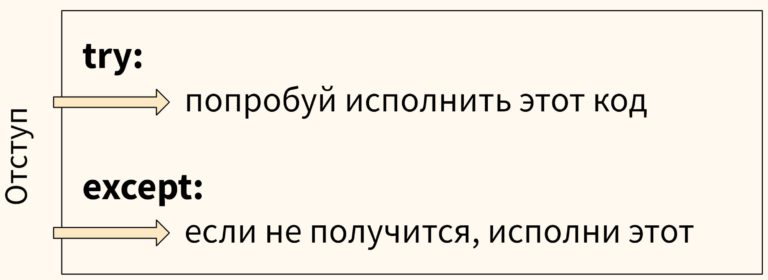

- Приведем пример.

In [ ]:
# пусть дан список чисел в строковом формате, и мы хотим посчитать их сумму
# предположим, буква "а" попала в список случайно
numbers: list[str] = ["5", "10", "a", "15", "10"]

# объявим переменную суммы
total: int = 0

# пройдемся по числам
for number in numbers:

    # попробуем прибавить число к переменной total
    try:
        total += int(number)

    # если же этого сделать не удастся
    except ValueError:
        # перейдем к следующему числу
        pass

# выведем сумму
total

40

- Если бы такой конструкции не было, при попытке прибавить букву «а» алгоритм вывел бы ошибку.
- Оператор pass просто говорит алгоритму продолжить работу. Вместо него можно вывести предупреждение.



In [ ]:
total = 0

for number in numbers:
    try:
        total += int(number)
    except ValueError:
        print(f"Элемент '{number}' обработать не удалось")

total

Элемент 'a' обработать не удалось


40

- Примечание. Обратите внимание на запись \'{number}\'. Обратная косая черта необходима, чтобы Питон воспринимал кавычки как часть строки.

## Обработка нескольких форматов дат
- Теперь давайте посмотрим, как эта конструкция работает с датами. Вначале скачаем и подгрузим в Google Colab данные среднемесячной температуры в Нью-Йорке в 2002 году (в градусах Фаренгейта).

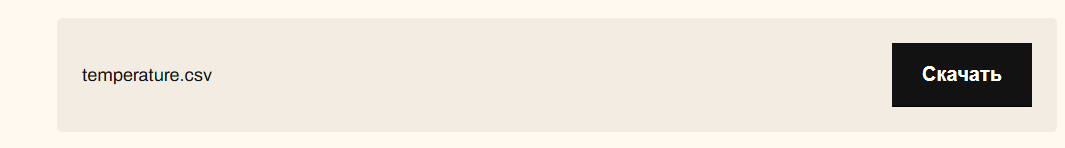

- На данном этапе вы уже должны быть экспертами по работе с внешними данными.

In [ ]:
# посмотрим на данные
# import pandas as pd
# temp = pd.read_csv('temperature.csv')
# temp

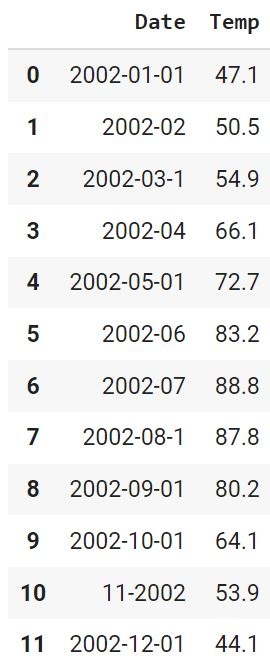 

- Предположим, что мы хотим вручную преобразовать каждую дату из строки в объект datetime. Теперь допустим, что проанализировав данные, мы выявили три шаблона: ГГГГ.ММ.ДД, ГГГГ.ММ.Д и ГГГГ.ММ. Напишем код, который в цикле for преобразует эти даты в объект datetime. Дополнительно наш код должен посчитать количество не обработанных записей.

In [47]:
# создадим список с известными нам шаблонами
# formats = ['%Y-%m-%d', '%Y-%m-%-d', '%Y-%m']

# создадим счетчик для записей, которые не обработались
# counter = 0

# пройдемся в цикле по столбцу Date
# for d in temp.Date:

# затем пройдемся по известным нам форматам
# for format in formats:

# попробуем, применив каждый из форматов,
# преобразовать строку с датой в объект datetime
# try:
# print(datetime.strptime(d, format))
# counter += 1

# если что-то пошло не так
# except:
# перейдем к следующему формату (второй цикл for) или записи (первый цикл for)
# pass

# посмотрим, сколько записей не обработалось
# print('Не обработалось записей:', len(temp) - counter)

- Как мы видим, один формат мы все же упустили (данные за ноябрь в формате ММ.ГГГГ), и Питон не смог обработать эту запись.
- Эту же работу мы можем поручить библиотеке Pandas через функцию read_csv() и параметр parse_dates (мы уже делали так, изучая временные ряды).

In [48]:
# temp_parsed = pd.read_csv('temperature.csv', index_col = 'Date', parse_dates = True)
# temp_parsed

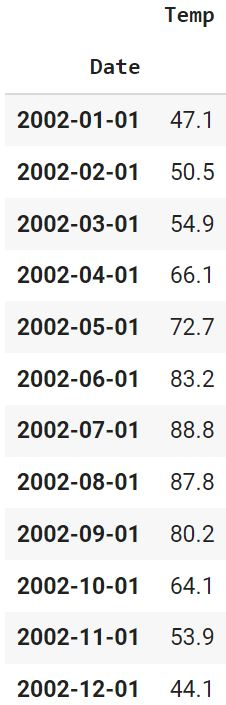

- В данном случае нам удалось обработать все записи, включая данные за ноябрь.

In [49]:
# индекс превратился в объект datetime
# type(temp_parsed.index)

- Иногда, как мы видим, решение «из коробки» (то есть уже готовое решение) более эффективно, чем написанный самостоятельно код.